##Tutorial 07

a)

In [20]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
url = 'https://raw.githubusercontent.com/Illiyas124/CSH4144_MachineLearning/refs/heads/main/Mall_Customers.csv'
data = pd.read_csv(url)

In [22]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
print("\nMissing values:")
print(data.isnull().sum())

# If missing values exist
data = data.dropna()


Missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


b)

In [24]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [25]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


c) Normalize using StandardScaler

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d) Apply K-Means (5 clusters)

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster labels added: ")
print(data.head())



Cluster labels added: 
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


e) Elbow Method (K = 1 to 10)

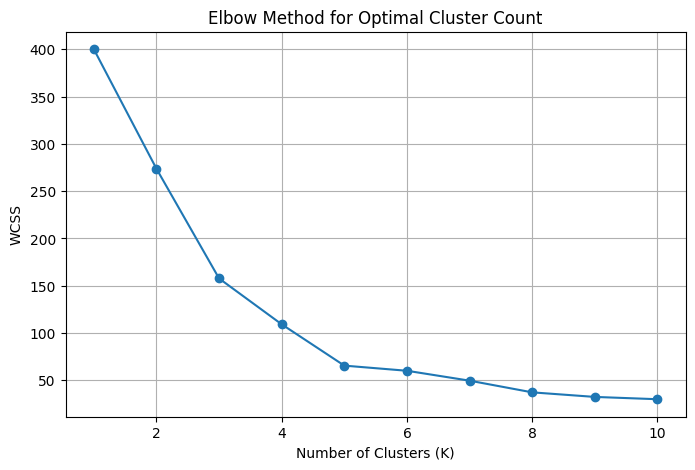

In [28]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Cluster Count")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


f) Cluster Visualization (2D scatter plot)

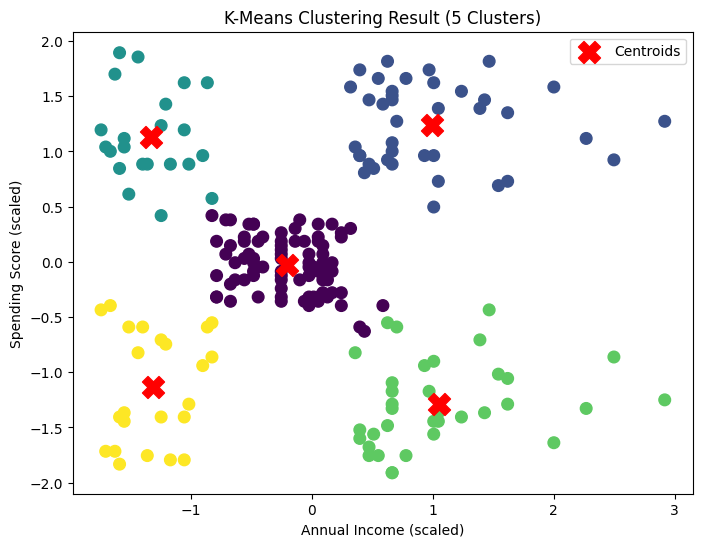

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1],
            c=data['Cluster'], s=70, cmap='viridis')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],
            s=250, marker='X', color='red', label='Centroids')

plt.title("K-Means Clustering Result (5 Clusters)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()


g) Print mean Spending Score & Annual Income for each cluster

In [30]:
cluster_stats = data.groupby("Cluster")[['Annual Income (k$)',
                                         'Spending Score (1-100)']].mean()

print("\nCluster-wise Mean Annual Income & Spending Score:")
print(cluster_stats)


Cluster-wise Mean Annual Income & Spending Score:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
